In [1]:
# Load dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [10]:
pB_metric = pd.read_csv('Resources/pB_metric.csv',index_col=False)
monthly_pB = pd.read_csv('Resources/monthly_pB.csv',index_col=False)

In [11]:
metric = pB_metric.drop(columns=['recirc_date','recirc_pB'])
metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 2 columns):
pB_metric_date    198 non-null object
pB_metric         198 non-null float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB


In [12]:
# Get datetime columns for metric and recirc
from datetime import datetime
metric['pB_metric_date'] = metric['pB_metric_date'].astype(str)
datetime_list = []
for i in range(len(pB_metric)):
    datetime_list.append(datetime.strptime(metric['pB_metric_date'][i],'%m/%d/%Y'))

In [13]:
metric['date'] = datetime_list
metric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 3 columns):
pB_metric_date    198 non-null object
pB_metric         198 non-null float64
date              198 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 4.8+ KB


In [16]:
recirc = pB_metric.drop(columns=['pB_metric_date','pB_metric']).dropna()
recirc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 187
Data columns (total 2 columns):
recirc_date    188 non-null object
recirc_pB      188 non-null float64
dtypes: float64(1), object(1)
memory usage: 4.4+ KB


In [17]:
recirc['recirc_date'] = recirc['recirc_date'].astype(str)
datetime_list = []
for i in range(len(recirc)):
    datetime_list.append(datetime.strptime(recirc['recirc_date'][i],'%m/%d/%Y'))

In [18]:
recirc['date'] = datetime_list
recirc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 188 entries, 0 to 187
Data columns (total 3 columns):
recirc_date    188 non-null object
recirc_pB      188 non-null float64
date           188 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 10.9+ KB


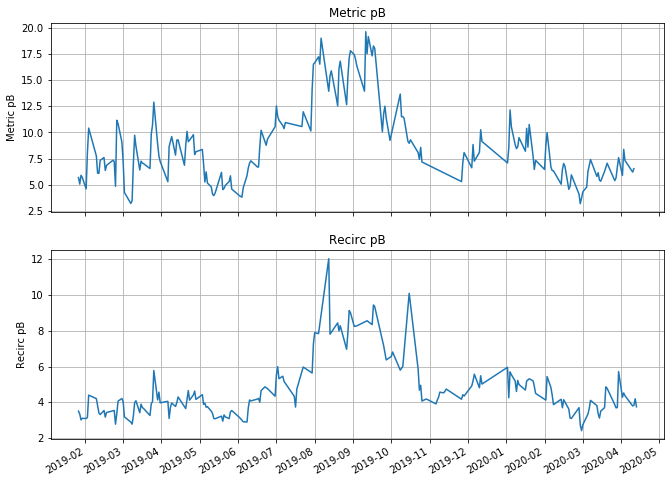

In [28]:
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
years_fmt = mdates.DateFormatter('%Y-%m')
tick_spacing = 30
fig,(ax1,ax2) = plt.subplots(2,sharex=True)
ax1.plot(metric['date'],metric['pB_metric'])
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax1.xaxis.set_major_formatter(years_fmt)
ax1.set_ylabel('Metric pB')

ax2.plot(recirc['date'],recirc['recirc_pB'])
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
ax2.xaxis.set_major_formatter(years_fmt)
ax2.xaxis.set_minor_locator(ticker.MultipleLocator(tick_spacing_minor))
ax2.set_ylabel('Recirc pB')

fig.autofmt_xdate()
ax1.grid(True)
ax2.grid(True)
ax1.set_title('Metric pB')
ax2.set_title('Recirc pB')
fig.set_size_inches(11, 8.5)
fig.savefig('Images/pB_error_inv.png', dpi=100)
plt.show()

Data from August through November 2019 will be kept in the model, however these plots help explain the large error in pB during that time. the pB model is strong and is only significantly off during this time period